# Linear regression with gradient descent

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import random

## Common used functions

### Error function and gradient

In [3]:
# This is the Mean Squared Error (MSE) function that is used to compute the loss
def MSE(a,b,data):
    # E(a,b) = (y1 - (a*x1 +b))^2 + (y2 - (a*x2+b))^2 + ..... + (yN - (a*xN+b))^2
    sumError = 0
    for x,y in data: #x,y coordinates of the points
        sumError+=(y-(a*x+b))**2
    return sumError

# This is the gradient of the MSE function that is used to update the equation's coefficients (a and b)
def gradientMSE(a,b,data):
    # gradA = dE(a,b)/da = -2*x*(y-a*x+b)
    # gradB = dE(a,b)/db = -2*(y-a*x+b)
    gradientA = 0;
    gradientB = 0;
    for x,y in data:
        gradientA += -2*x*(y-(a*x+b))
        gradientB += -2*(y-(a*x+b))

    return np.array([gradientA,gradientB])

### Visualization

In [64]:
# This method show the evolution of the linear regression by displaying the lines made with the coefficients ax+b at each iteration on a graph
def showRegressionEvolution(coefHistory,data,xmin,xmax):
    VX = np.linspace(xmin,xmax)

    # Plot every line except the lasts one thanks to the coefficient a and b 
    for i in range(len(coefHistory)-1): 
        a,b = coefHistory[i]
        VY = a*VX+b
        plt.plot(VX,VY,color="red",alpha=0.15)
    
    # Plot the last line with the latest coeffcients in black 
    a,b = coefHistory[-1]
    VY = a*VX+b
    plt.plot(VX,VY,color="black")
    plt.title("Final equation : y = " + str(np.round(a,2)) + "*x + " + str(np.round(b,2)))

    # Plot the data points on the graph
    for x,y in data:
        plt.scatter(x,y,color="black")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

    
# This method show the evolution of the loss at each eopch on a graph 
def showLossEvolution(lossHistory): 
    VX = np.linspace(0,len(lossHistory),len(lossHistory))
    plt.plot(VX,lossHistory)
    
    plt.title("Loss evolution")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# This method show the evolution of the coefficients (a and b) at each iteration on a graph
def showCoefficientsEvolution(coefHistory): 
    VX = np.linspace(0,len(coefHistory),len(coefHistory))

    curveA = [coef[0] for coef in coefHistory] # Take the first element of the tuples
    curveB = [coef[1] for coef in coefHistory] # Take the second element of the tuples

    plt.plot(VX,curveA,label="Coef a")
    plt.plot(VX,curveB,label="Coef b")
   
    plt.title("Coefficients evolution")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    
    plt.grid(True)
    plt.legend()
    plt.show()

# This method show the evolution of the gradient at each iteration on a graph
def showGradientsEvolution(gradientHistory): 
    VX = np.linspace(0,len(gradientHistory),len(gradientHistory))

    curveGradA = [grad[0] for grad in gradientHistory] # Take the first element of the tuples
    curveGradB = [grad[1] for grad in gradientHistory] # Take the second element of the tuples

    plt.plot(VX,curveGradA,label="Grad a")
    plt.plot(VX,curveGradB,label="Grad b")
   
    plt.title("Gradient evolution")
    plt.xlabel("Iteration")
    plt.ylabel("Gradient value")

    plt.grid(True)
    
    plt.legend()
    plt.show()

## Classic Gradient Descent

### Gradient Descent algorithm

In [6]:
# This is the classic gradient descent algorithm
def gradientDescent(MSE, gradientMSE,data, startingCoefficients, learningRate,nbIteration):
    
    coefHistory = [] # Used to save the value of a and b at each iteration
    lossHistory = [] # Used to save the value of the loss at each iteration
    gradientHistory = [] # Used to save the value of the gradient at each iteration
    X = startingCoefficients # This is a tuple (a,b) with a and b the starting coefficients
    
    for _ in range(nbIteration): # Here, one iteration = one epoch
            
        loss = MSE(*X,data) # Compute the loss thanks to the data and the coefficients a and b
        grad = gradientMSE(*X,data) # Compute the gradient 
        
        # Save the coefficients, loss and gradient of the current iteration (epoch) in the lists
        coefHistory.append(X)
        lossHistory.append(loss)
        gradientHistory.append(grad)
        
        X = X-learningRate*grad # Update the coefficients a and b 
        
    return coefHistory, lossHistory, gradientHistory

### Process GD + Visualization

In [7]:
# This method use the gradient descent algorithm and display informations such as the loss evolution
def showGradientDescent(MSE, gradientMSE,data, startingCoefficients, learningRate,nbIteration,xmin,xmax):
    # Gradient descent aglorithm
    coefHistory, lossHistory, gradientHistory = gradientDescent(MSE,gradientMSE,data,startingCoefficients,learningRate,nbIteration)
    print("Trained for {} iterations :\n MSE at the last iteration : {}\n Gradients at the last iteration : {}\n Value of the parameters ax+b at the last iteration : {}x+{} ".format(nbIteration,lossHistory[-1],gradientHistory[-1],coefHistory[-1][0],coefHistory[-1][1]))
    
    # Call the visualization methods
    showRegressionEvolution(coefHistory,data,xmin,xmax)
    showLossEvolution(lossHistory)
    showCoefficientsEvolution(coefHistory)
    showGradientsEvolution(gradientHistory)
    

### Tests on data

#### Test 1 : 3 points

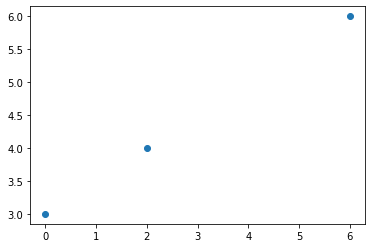

In [242]:
# Create data
data = [(0,3),(2,4),(6,6)] # Take 3 points on this line : y=1/2x + 3
x = [0,2,6]
y = [3,4,6]

# Choose parameters
startingCoefficients = (0,1)
learningRate = 0.02
nbIteration=100

# Display the data
plt.scatter(x,y)
plt.show()

Trained for 100 iterations :
 MSE at the last iteration : 8.188069279254093e-05
 Gradients at the last iteration : [ 0.00425254 -0.02054807]
 Value of the parameters ax+b at the last iteration : 0.5015816262211173x+2.9923576524086295 


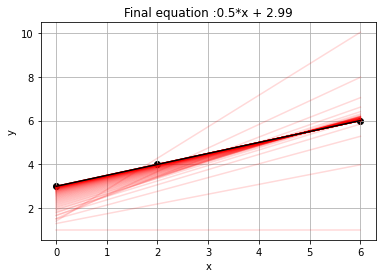

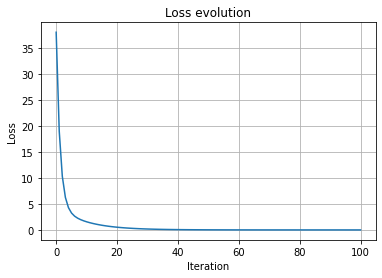

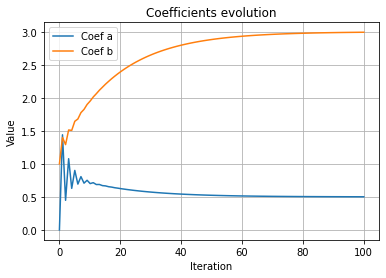

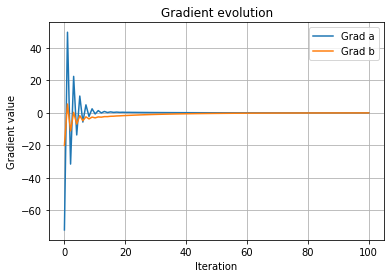

In [243]:
showGradientDescent(MSE,gradientMSE,data,startingCoefficients,learningRate,nbIteration,min(x),max(x))   

#### Test 2 : 30 points randomly distributed (with a gaussian N(0,3)) around y=2x-6

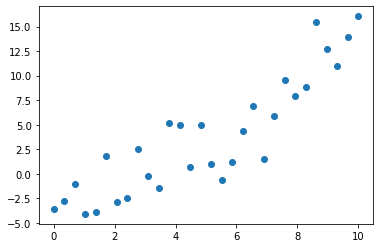

In [244]:
# Create data
f = lambda x : 2*x-6
X = np.linspace(0,10,30)
Y = [f(x) + random.gauss(0,3) for x in X] 
data = [(x,y) for x,y in zip(X,Y)]

# Choose parameters
startingCoefficients = (1,1)
learningRate = 0.0001 # Very low learning rate to avoid divergence 
nbIteration=4000

# Display the data
plt.scatter(X,Y)
plt.show()

Trained for 4000 iterations :
 MSE at the last iteration : 218.61556101371656
 Gradients at the last iteration : [-0.02849186  0.19175572]
 Value of the parameters ax+b at the last iteration : 1.7488931653305326x+-4.970923546801775 


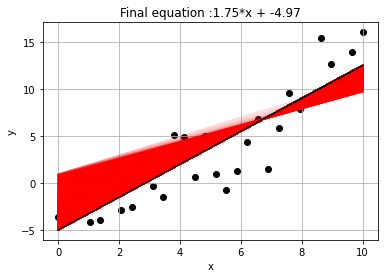

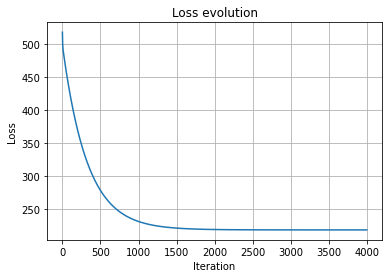

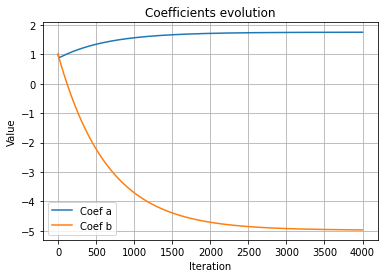

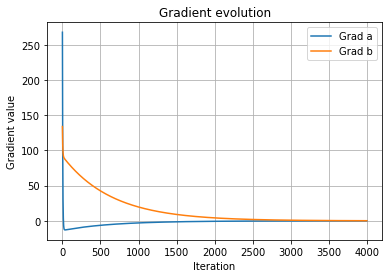

In [245]:
showGradientDescent(MSE,gradientMSE,data,startingCoefficients,learningRate,nbIteration,min(X),max(X)) 

## Stochastic Gradient Descent

### Error function and gradient

In [246]:
# This is the Error function used to compute the loss for SGD
def E(a,b,data):
    # E(a,b) = (y - (a*x +b))^2 
    x,y = data # x and y coordinates of the point
    return (y-(a*x+b))**2


# This is the gradient of the Error function used to update the equation's coefficients (a and b) for SGD
def gradientE(a,b,data):
    # gradA = dE(a,b)/da = -2*x*(y-a*x+b)
    # gradB = dE(a,b)/db = -2*(y-a*x+b)
    x,y = data
    gradientA = -2*x*(y-(a*x+b))
    gradientB = -2*(y-(a*x+b))

    return np.array([gradientA,gradientB])

###  Stochastic gradient descent aglorithm

In [247]:
# This is the stochastic gradient descent algorithm
def stochasticGradientDescent(E, gradientE,data, startingCoefficients, learningRate,nbIteration):
    
    coefHistory = [] # Used to save the value of a and b at each iteration
    lossHistory = [] # Used to save the value of the loss at each iteration
    gradientHistory = [] # Used to save the value of the gradient at each iteration
    X = startingCoefficients # This is a tuple (a,b) with a and b the starting coefficients
    
    for _ in range((int)(nbIteration/len(data))): # nbIterations/len(data) = number of epochs
        
        for i in range(len(data)): # len(data) iterations are made here
            
            loss = E(*X,data[i]) # Compute the loss for one data and the coefficients a and b
            grad = gradientE(*X,data[i]) # Compute the gradient for one data

            # Save the coefficients, loss and gradient of the current data in the lists
            coefHistory.append(X)
            lossHistory.append(loss)
            gradientHistory.append(grad)

            X = X-learningRate*grad # Update the coefficients a and b 
        
    return coefHistory, lossHistory, gradientHistory

### Process SGD + Visualization

In [248]:
# This method use the stochastic gradient descent algorithm and display informations such as the loss evolution
def showStochasticGradientDescent(E, gradientE,data, startingCoefficients, learningRate,nbIteration,xmin,xmax):
    # Stochastic Gradient descent aglorithm
    coefHistory, lossHistory, gradientHistory = stochasticGradientDescent(E,gradientE,data,startingCoefficients,learningRate,nbIteration)
    print("Trained for {} iterations :\n Error at the last iteration : {}\n Gradients at the last iteration : {}\n Value of the parameters ax+b at the last iteration : {}x+{} ".format(nbIteration,lossHistory[-1],gradientHistory[-1],coefHistory[-1][0],coefHistory[-1][1]))
    
    # Call the visualization methods
    showRegressionEvolution(coefHistory,data,xmin,xmax)
    showLossEvolution(lossHistory)
    showCoefficientsEvolution(coefHistory)
    showGradientsEvolution(gradientHistory)

### Test on data

#### Test 1 : with the same 3 points on 300 iterations

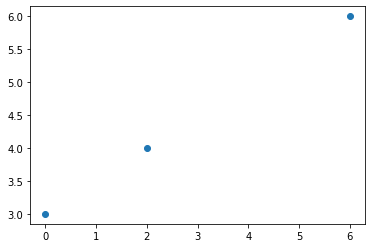

In [249]:
# Create data
data = [(0,3),(2,4),(6,6)] # Take 3 points on this line : y=1/2x + 3
x = [0,2,6]
y = [3,4,6]

# Choose parameters
startingCoefficients = (0,1)
learningRate = 0.02
nbIteration=300

# Display the data
plt.scatter(x,y)
plt.show()

Trained for 300 iterations :
 Error at the last iteration : 2.2229555978431776e-06
 Gradients at the last iteration : [0.0178915  0.00298192]
 Value of the parameters ax+b at the last iteration : 0.5011488637014356x+2.9945977757377555 


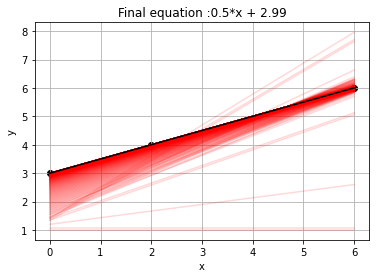

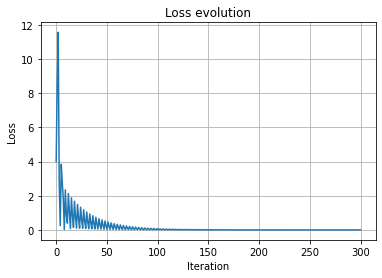

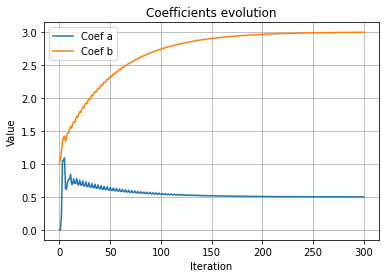

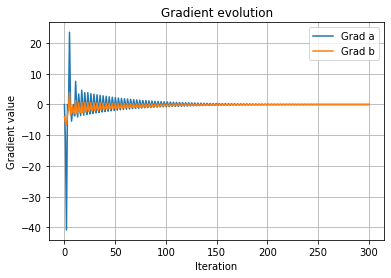

In [250]:
showStochasticGradientDescent(E,gradientE,data,startingCoefficients,learningRate,nbIteration,min(x),max(x))   

## Mini-batch Stochastic Gradient Descent

### Mini-batch Stochastic Gradient Descent algorithm

In [8]:
# This is mini-batch stochastic gradient descent algorithm
def miniBatchSGD(E, gradientE,data, startingCoefficients, learningRate,nbEpoch,batchSize):
    
    coefHistory = [] # Used to save the value of a and b at each iteration
    lossHistory = [] # Used to save the value of the loss at each iteration
    gradientHistory = [] # Used to save the value of the gradient at each iteration
    X = startingCoefficients # This is a tuple (a,b) with a and b the starting coefficients
    
    for _ in range(nbEpoch): 
        
        for i in range((int)(np.ceil(len(data)/batchSize))): # Number of steps (iterations)
            batchData = data[i*batchSize:i*batchSize+batchSize] #Create the sublist that contains batchSize data       
            
            loss = MSE(*X,batchData) # Compute the loss thanks to the data and the coefficients a and b
            grad = gradientMSE(*X,batchData) # Compute the gradient 

            # Save the coefficients, loss and gradient of the current iteration (epoch) in the lists
            coefHistory.append(X)
            lossHistory.append(loss)
            gradientHistory.append(grad)

            X = X-learningRate*grad # Update the coefficients a and b 
        
    return coefHistory, lossHistory, gradientHistory

### Process Mini batch SGD + Visualization

In [9]:
# This method use the mini batch SGD algorithm and display informations such as the loss evolution
def showMiniBatchSGD(MSE, gradientMSE,data, startingCoefficients, learningRate,nbEpoch,batchSize,xmin,xmax):
    # Gradient descent aglorithm
    coefHistory, lossHistory, gradientHistory = miniBatchSGD(MSE,gradientMSE,data,startingCoefficients,learningRate,nbEpoch,batchSize)
    print("Trained for {} epochs :\n Error at the last iteration : {}\n Gradients at the last iteration : {}\n Value of the parameters ax+b at the last iteration : {}x+{} ".format(nbEpoch,lossHistory[-1],gradientHistory[-1],coefHistory[-1][0],coefHistory[-1][1]))
    
    # Call the visualization methods
    showRegressionEvolution(coefHistory,data,xmin,xmax)
    showLossEvolution(lossHistory)
    showCoefficientsEvolution(coefHistory)
    showGradientsEvolution(gradientHistory)

### Test on data

#### Test 1 : 30 points on y=2x-6 with a batch size of 5

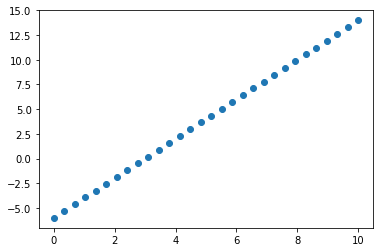

In [10]:
# Create data
f = lambda x : 2*x-6
X = np.linspace(0,10,30)
Y = [f(x) for x in X] 
data = [(x,y) for x,y in zip(X,Y)]

# Choose parameters
startingCoefficients = (1,1)
learningRate = 0.0001 # Very low learning rate to avoid divergence 
nbEpoch = 4000
batchSize = 5

# Display the data
plt.scatter(X,Y)
plt.show()

Trained for 4000 epochs :
 Error at the last iteration : 0.00014897716267880126
 Gradients at the last iteration : [-0.5042755  -0.05363055]
 Value of the parameters ax+b at the last iteration : 1.9979157560956675x+-5.985958025586814 


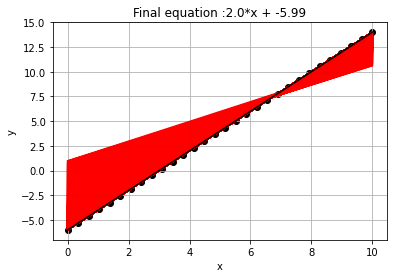

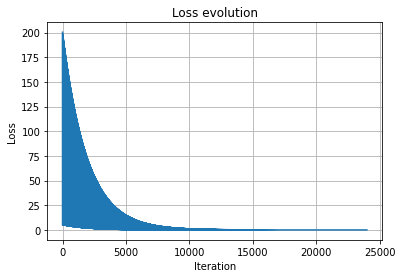

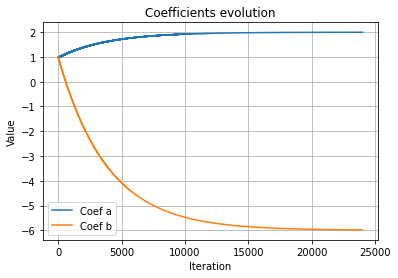

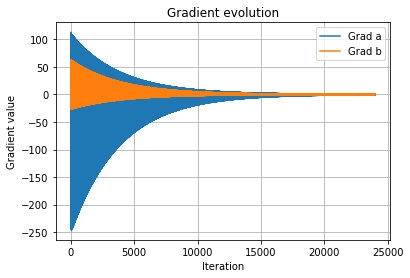

In [254]:
showMiniBatchSGD(MSE, gradientMSE,data, startingCoefficients, learningRate,nbEpoch,batchSize,min(X),max(X))

#### Test 2 : 30 points randomly distributed (with a gaussian N(0,3)) around y=-3x+4 with a batch size of 10

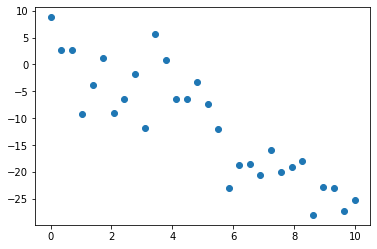

In [62]:
# Create data
f = lambda x : -3*x+4
X = np.linspace(0,10,30)
Y = [f(x) + random.gauss(0,5) for x in X] 
data = [(x,y) for x,y in zip(X,Y)]

# Choose parameters
startingCoefficients = (1,1)
learningRate = 0.00005 # Very low learning rate to avoid divergence 
nbEpoch = 5000
batchSize = 10

# Display the data
plt.scatter(X,Y)
plt.show()

Trained for 5000 epochs :
 Error at the last iteration : 70.94035285567169
 Gradients at the last iteration : [43.50597913  5.80567038]
 Value of the parameters ax+b at the last iteration : -3.0397073042434557x+4.00286506792959 


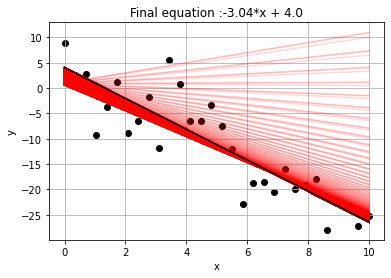

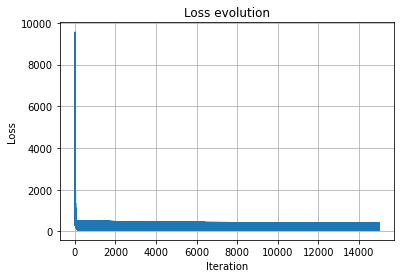

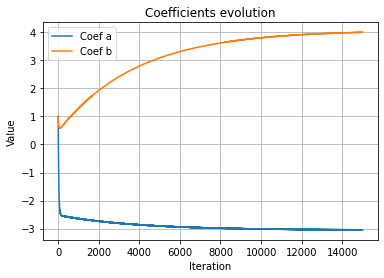

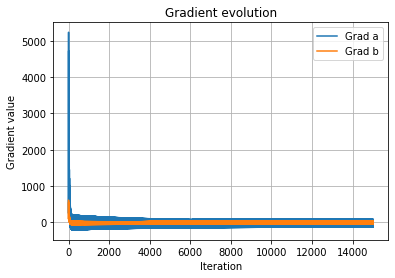

In [63]:
showMiniBatchSGD(MSE, gradientMSE,data, startingCoefficients, learningRate,nbEpoch,batchSize,min(X),max(X))